<a href="https://colab.research.google.com/github/jose01ve/Diplomadove_01/blob/main/S7_C2_20_03_2025_kmeans_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
from google.colab import drive # Conectanonos con google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
folder_path = '/content/drive/MyDrive/Personal/33-ESTUDIOS/02-DIPLOMADO'
import os    # la librería necesaria para la ruta de la carpeta
os.chdir(folder_path) # ruta de la carpeta

#mostar lista de archivos
os.listdir()

['INVENTARIO DE ACTIVOS - PHI (1).xlsx',
 'marketing_extract_2X_Income (1).xlsx',
 'NOTAS DIPLOMADO.gdoc',
 '[Marketing]-Mall_Customers.csv']

In [47]:
df = pd.read_csv('[Marketing]-Mall_Customers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [48]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [49]:
df = df.drop(['CustomerID'], axis=1)
df.head(7)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6


In [50]:
# Inicializar el encoder
le = LabelEncoder()
# Aplicar el encoder a la columna 'Gender'
df['Gender_TAG'] = le.fit_transform(df['Gender'])

In [51]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [52]:
df_tag = df

In [53]:
df = df.drop(['Gender'], axis=1)
df.head(3)

,Age,Annual Income (k$),Spending Score (1-100),Gender_TAG
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0


In [54]:
df_tag.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_TAG
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


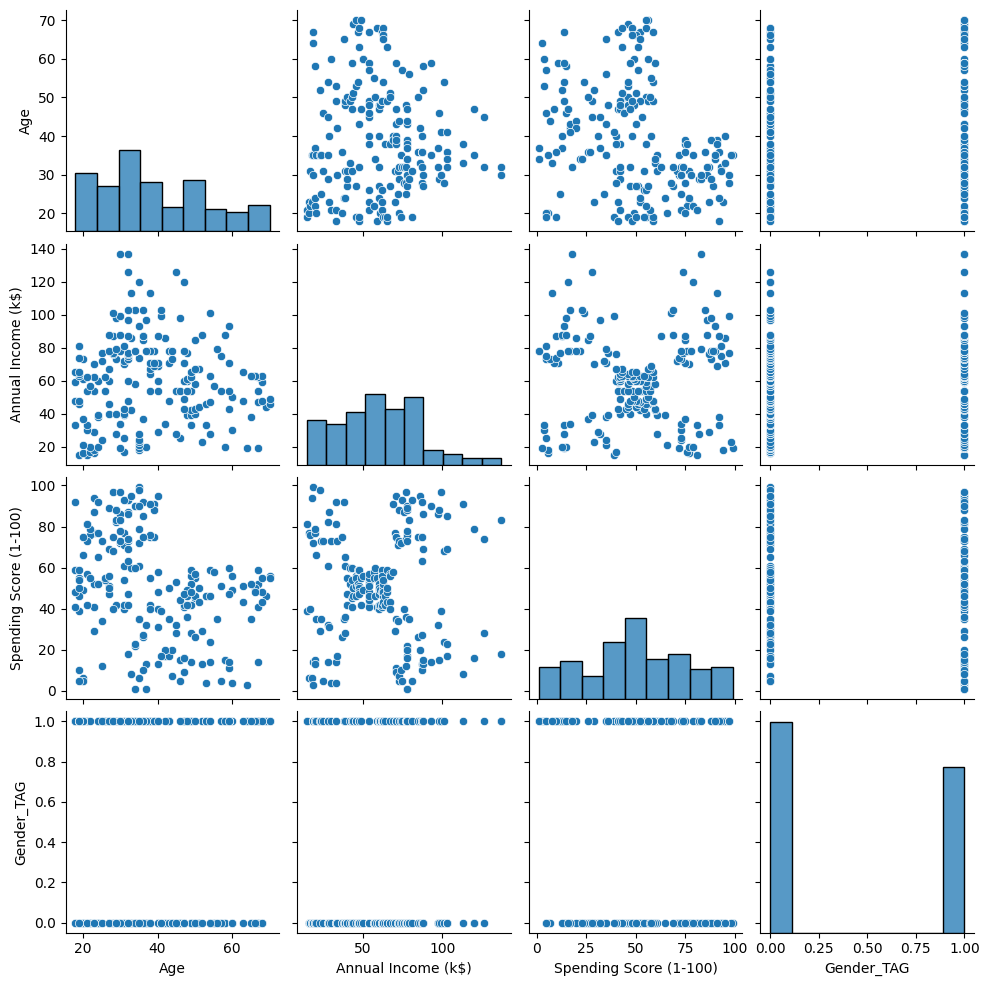

In [55]:
sns.pairplot(df)

In [56]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100),Gender_TAG
Age,1.000000,-0.012398,-0.327227,0.060867
Annual Income (k$),-0.012398,1.000000,0.009903,0.056410
Spending Score (1-100),-0.327227,0.009903,1.000000,-0.058109
Gender_TAG,0.060867,0.056410,-0.058109,1.000000


# Selección de variables

* Se observa que los hombres y las mujeres tienen los mismos comportamientos de edad, ingreso y compras por lo tanto se elimina del df

In [57]:
df = df.drop(['Gender_TAG'], axis=1)
df.head(3)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6


# Parte 2. Cuántos clusters necesitamos?


Aplicamos el metodo del cliente donde medimos la inercia del grupos en busca del punto de inflexoión

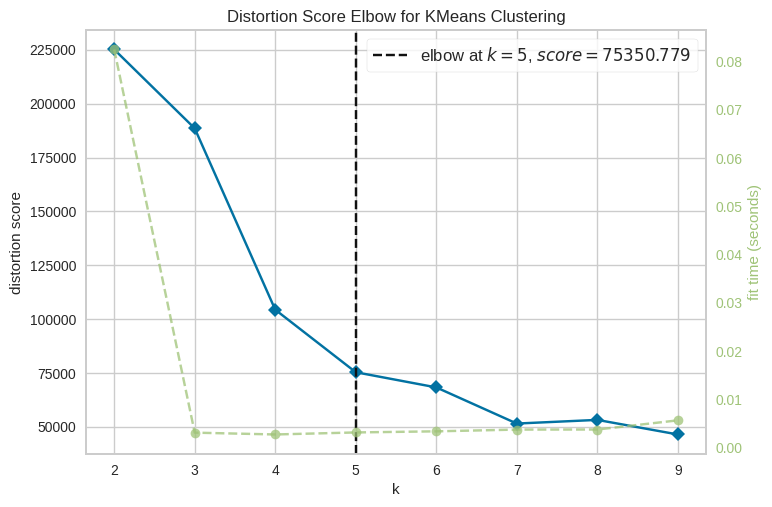

In [58]:
# Codigo del notebook   https://www.kaggle.com/code/datark1/customers-clustering-k-means-dbscan-and-ap/notebook
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df)
visualizer.show()
plt.show()

Con el ánalisis del método del codo se observa que un número pertinente de centroides es 5.

In [59]:
model_5k = KMeans(n_clusters=5, random_state=1).fit(df)
model_5k.cluster_centers_

array([[43.08860759, 55.29113924, 49.56962025],
       [40.66666667, 87.75      , 17.58333333],
       [25.52173913, 26.30434783, 78.56521739],
       [32.69230769, 86.53846154, 82.12820513],
       [45.2173913 , 26.30434783, 20.91304348]])

Text(0.5, 0, 'Spending Score (1-100)')

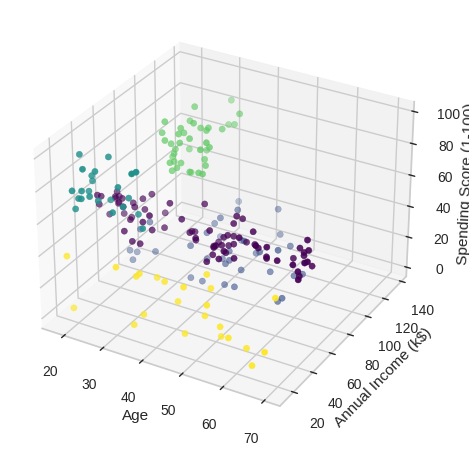

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot data points
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=model_5k.labels_, cmap = 'viridis' )
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

In [61]:
df.head(5)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### Etiquetar  el df en los clusters
Al df original se le agrega la columnas con las etiquetas de los clusters


In [62]:
df_5k = df.copy()
df_5k['Cluster'] = model_5k.labels_
df_5k.head(20)

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,4
1,21,15,81,2
2,20,16,6,4
3,23,16,77,2
4,31,17,40,4
5,22,17,76,2
6,35,18,6,4
7,23,18,94,2
8,64,19,3,4
9,30,19,72,2


In [63]:
df_5k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
 3   Cluster                 200 non-null    int32
dtypes: int32(1), int64(3)
memory usage: 5.6 KB


In [ ]:
df_5k.groupby('Cluster').mean()

In [64]:
cluster_0 = df_5k.loc[df_5k['Cluster'] == 0]
cluster_0.describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,79.000000,79.000000,79.000000,79.0
mean,43.088608,55.291139,49.569620,0.0
std,16.478572,8.710665,6.242295,0.0
min,18.000000,40.000000,35.000000,0.0
25%,27.000000,48.000000,44.500000,0.0
50%,47.000000,54.000000,50.000000,0.0
75%,54.500000,62.000000,55.000000,0.0
max,70.000000,76.000000,60.000000,0.0


In [65]:
cluster_1 = df_5k.loc[df_5k['Cluster'] == 1]
cluster_1.describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,36.000000,36.000000,36.000000,36.0
mean,40.666667,87.750000,17.583333,1.0
std,11.496583,16.387059,10.204691,0.0
min,19.000000,70.000000,1.000000,1.0
25%,34.000000,77.000000,10.000000,1.0
50%,41.500000,83.000000,16.000000,1.0
75%,47.250000,97.250000,24.500000,1.0
max,59.000000,137.000000,39.000000,1.0


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


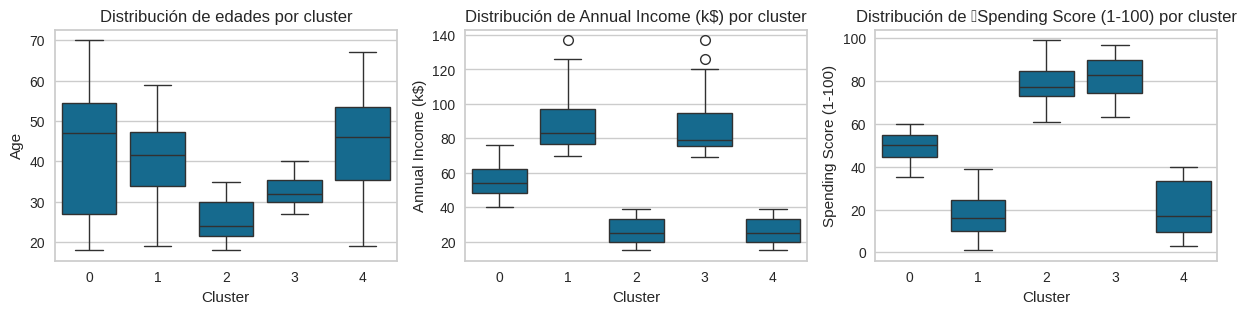

In [66]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.boxplot(x='Cluster', y='Age', data=df_5k)
plt.title('Distribución de edades por cluster')
plt.subplot(1,3,2)
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df_5k)
plt.title('Distribución de Annual Income (k$) por cluster')
plt.subplot(1,3,3)
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df_5k)
plt.title('Distribución de 	Spending Score (1-100) por cluster')
plt.show()